# **Libraries**

In [1]:
import scipy.integrate as integrate
import scipy.special as special
from scipy import integrate

import sympy as sym

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# **Quadratic Minimum**

$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (f(\theta_n)-y_n)^2$$

$$J(\theta) = \frac{1}{2N} (X \theta - y)^T(X \theta -y)$$

**Gradient**

$$ \frac{d J(\theta)}{d \theta} = \frac{1}{N} X^T(X \theta -y)$$

In [ ]:
(1/m)* (X.T @ (h-y))

# **Utilitary functions**

In [3]:
def costfunction(X,y,theta):
    m = np.size(y)

    # Cost function in vector format
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;

# Gradient descent
def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):

    # Initial values
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] 

    for i in range(num_iters):

        # Gradient in vector form

        h = X @ theta
        theta = theta - alpha * (1/m)* (X.T @ (h-y))

        # Final and Intermediate cost function values

        J_history[i] = costfunction(X,y,theta)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist

# **Translating into code**

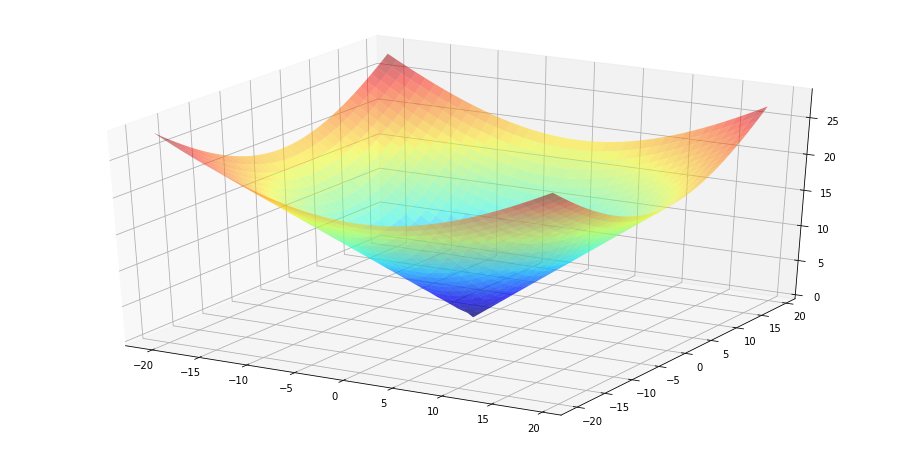

In [41]:
X = np.arange(-20,20)
Y = X
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**2)

fig = plt.figure(figsize = (16,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'jet', alpha=0.5)
plt.show()

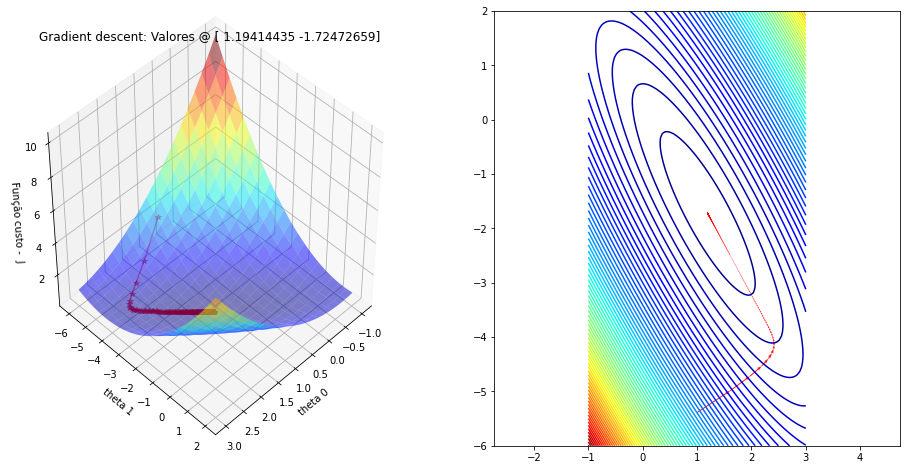

In [8]:
# Creation of vector X

x = np.linspace(0,1,40)
X = np.vstack((np.ones(len(x)),x)).T

# Loading vector y
noise = 1*np.random.uniform( size = 40)
y = np.cos(x * 1.5 * np.pi )
y_noise = (y + noise).reshape(-1,1)

# Variations of grid to investigate the values of Theta

T0, T1 = np.meshgrid(np.linspace(-1,3,100),np.linspace(-6,2,100))

# For each combination value of the parameters determines the cost function

zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )

# Puts values in proper format for plotting 
Z = zs.reshape(T0.shape)

# Estimate the values of the gradient descent

theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([0,-6]).reshape(-1,1),alpha = 0.3,num_iters=1000)

# Generates the data to plot the contours

anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

fig = plt.figure(figsize = (16,8))

# Plotting the surface

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Função custo -  J')
ax.set_title('Gradient descent: Valores @ {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


# Plotting the contours

ax = fig.add_subplot(1, 2, 2)
plt.axis('equal')
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

# **A Wine Issue**

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns',20)

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLprobabilistico/Vinhos/winequality-red.csv', delimiter=';')

In [ ]:
y = np.array(df['density'])
x = np.array(df['fixed acidity'])

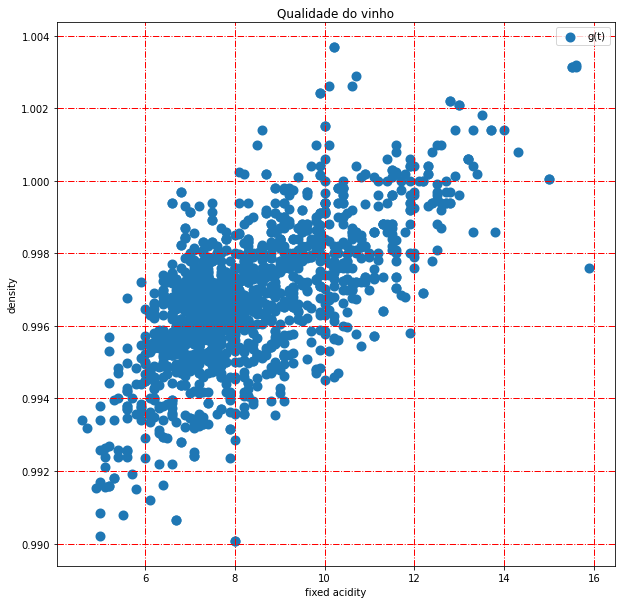

In [ ]:
# Dots visualization

fig= plt.figure(figsize=(10,10))

plt.scatter(x,y,label="g(t)",linewidth = 4)     # sinal em investigação
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Quality of wine")
plt.ylabel("density")
plt.xlabel("fixed acidity")
plt.legend(loc='upper right')

plt.show()

## **Applying the classic method**

Algorithm to determine the regression between two variables:

\begin{equation}
    \theta_1 = \frac{\overline{x_n \; y_n}-\overline{x_n}\;\overline{y_n}}{\overline{x_n^2}-\overline{x_n}^2}
\end{equation}

\begin{equation}
    \theta_0 = \overline{ y_n} -\theta_1 \overline{x_n}
\end{equation}


In [ ]:
T1 = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
T0 = np.mean(y) - T1*np.mean(x)

print(T1,T0)

0.0007241577183646439 0.9907219496290327


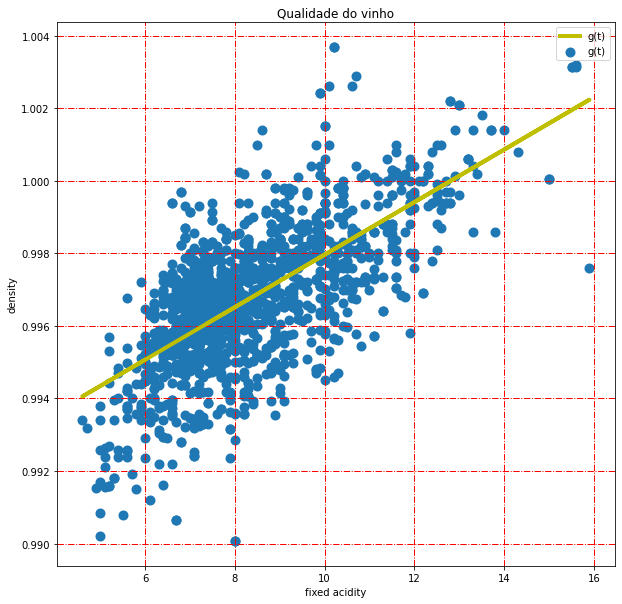

In [ ]:
ym = T0 + T1*x                      # Values obtained from the model

# Dots visualization

fig= plt.figure(figsize=(10,10))

plt.scatter(x,y,label="g(t)",linewidth = 4)               # Samples
plt.plot(x,ym,label="g(t)",linewidth = 4,color='y')       # Predicted values
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Quality of wine")
plt.ylabel("density")
plt.xlabel("fixed acidity")
plt.legend(loc='upper right')

plt.show()

## **Applying the vectorial calculation**

In [ ]:
y = np.array(df['density'])
x = np.array(df['fixed acidity'])

X = np.vstack((np.ones(len(x)),x)).T
y_noise = np.array([[i] for i in y])

Theta = np.linalg.inv(X.T @ X)@ X.T @ y


In [ ]:
Theta

array([9.90721950e-01, 7.24157718e-04])

## **Applying the descending gradient**

In [ ]:
y = np.array(df['density'])
x = np.array(df['fixed acidity'])

X = np.vstack((np.ones(len(x)),x)).T
y_noise = np.array([[i] for i in y])


# Estimations Estimando a partir do gradiente descendente

theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([0.99,0.0005]).reshape(-1,1),alpha = 0.001,num_iters=10000)


In [ ]:
print(theta_0[-1],theta_1[-1])

0.9902677744176837 0.0007764892626121668


## **More complex functions**

In [ ]:
def eggholder(x):
...     return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
...             -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

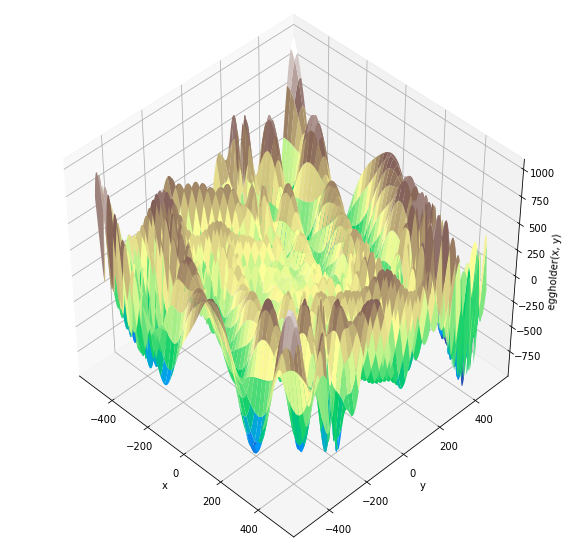

In [ ]:
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')

plt.show()

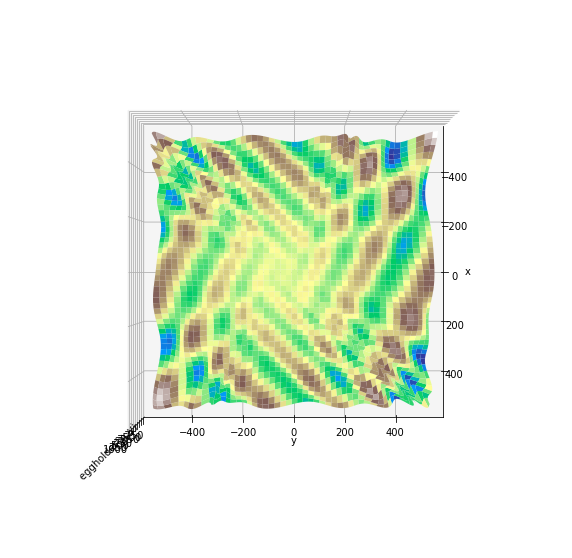

In [ ]:
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(90, 0)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [ ]:
limites = [(-512, 512), (-512, 512)]

from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, limites)
results['shgo']

     fun: -935.3379515605128
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 2
   nlfev: 50
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097806, 453.97741934])
      xl: array([[439.48097806, 453.97741934]])

## **Back to wine**

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns',20)

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLprobabilistico/Vinhos/winequality-red.csv', delimiter=';')

In [ ]:
y = np.array(df['density'])
x = np.array(df['fixed acidity'])

In [ ]:
def vinho(x):
  
    theta = np.array([x[0],x[1]]).reshape(-1,1)

    # é necessário carregar os dados localmente
    # trata-se de uma função numérica e não explícita
    
    y = np.array(df['density'])
    x = np.array(df['fixed acidity'])  

    X = np.vstack((np.ones(len(x)),x)).T
    y = np.array([[i] for i in y]) 

    N = np.size(y)

    # Na forma vetorial
    h = X @ theta
    J = float((1./(2*N)) * (h - y).T @ (h - y));    
    return J;

In [ ]:
bounds = [(0.99, 1.005), (0, 17)]

from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(vinho, bounds)
results['shgo']

     fun: 9.85553974063868e-07
    funl: array([9.85553974e-07])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 2
   nlfev: 22
   nlhev: 0
   nljev: 5
 success: True
       x: array([9.90723250e-01, 7.24000503e-04])
      xl: array([[9.90723250e-01, 7.24000503e-04]])

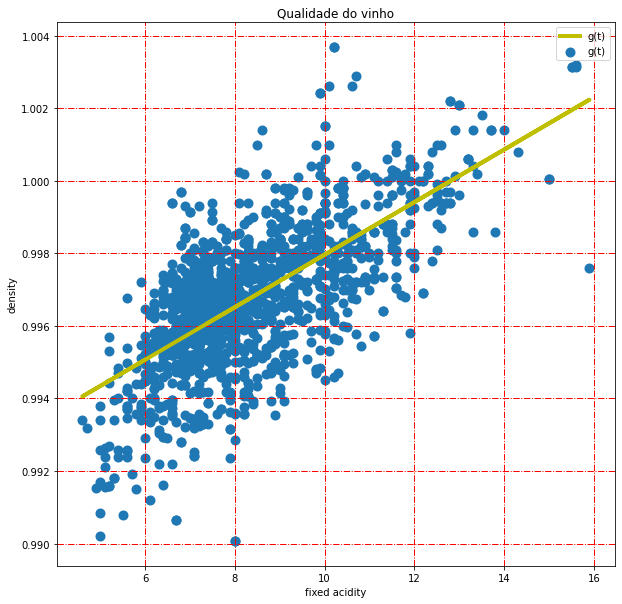

In [ ]:
ym = T0 + T1*x                      # valores obtidos a partir do modelo

# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.scatter(x,y,label="g(t)",linewidth = 4)               # amostras
plt.plot(x,ym,label="g(t)",linewidth = 4,color='y')       # Valores preditos
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Qualidade do vinho")
plt.ylabel("density")
plt.xlabel("fixed acidity")
plt.legend(loc='upper right')

plt.show()

## **Intervalo de confiança**

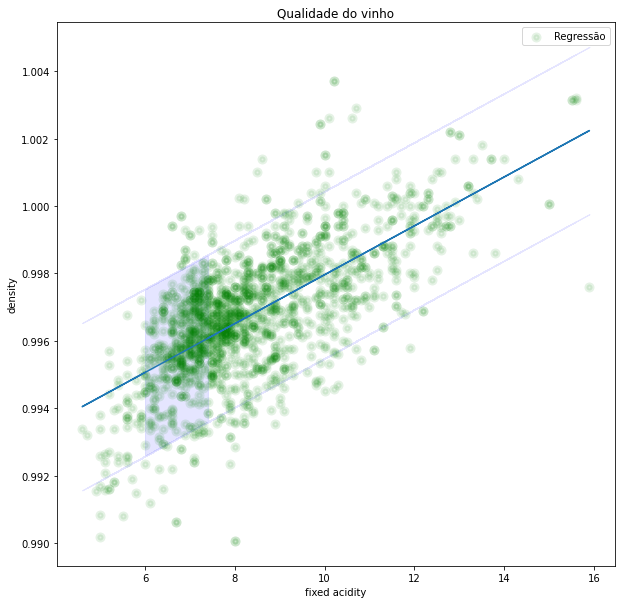

In [ ]:
# Intervalo de confiança

erro = y-ym

ci = 1.96 * np.std(ym)/np.mean(ym)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,ym)
ax.fill_between(x, (ym-ci), (ym+ci), color='b', alpha=.1)
plt.scatter(x,y,label="Regressão",linewidth = 4,color='g', alpha=.1)     # amostras

plt.title("Qualidade do vinho")
plt.ylabel("density")
plt.xlabel("fixed acidity")
plt.legend(loc='upper right')

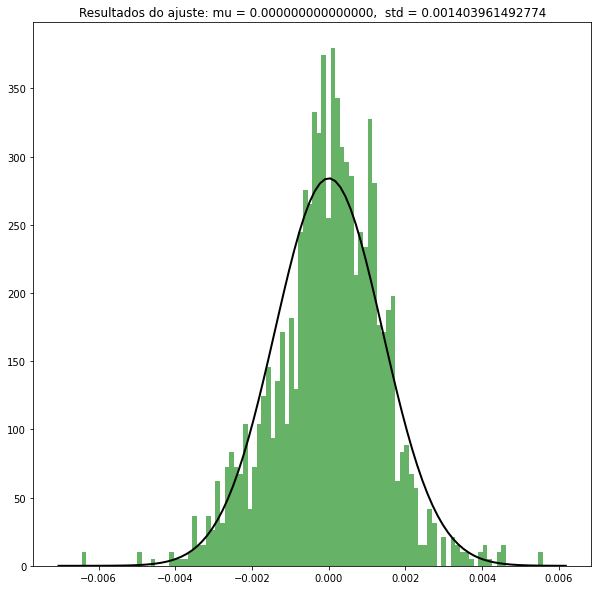

In [ ]:
from scipy.stats import norm

# Análsie do erro enquanto variável aleatória
data = erro

# Ajuste de uma curva normal ao erro obtido

mu, std = norm.fit(data)

fig= plt.figure(figsize=(10,10))

# Histograma
plt.hist(data, bins=100, density=True, alpha=0.6, color='g')

# Visualizando a funÇão densidade de probabilidade sobreposta

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Resultados do ajuste: mu = %.15f,  std = %.15f" % (mu, std)
plt.title(title)

plt.show()

# **Verossimilhança**

In [ ]:
pv1 = norm.pdf(x, mu, std)
pv2 = norm.pdf(x, 1.1*mu, 1.1*std)
pv3 = norm.pdf(x, 0.9*mu, 0.9*std)
pv4 = norm.pdf(x, 0.5*mu, 0.5*std)
pv5 = norm.pdf(x, 0.1*mu, 0.1*std)

h1 = norm.pdf(data[1], mu, std)
h2 = norm.pdf(data[1], 1.1*mu, 1.1*std)
h3 = norm.pdf(data[1], 0.9*mu, 0.9*std)
h4 = norm.pdf(data[1], 0.5*mu, 0.5*std)
h5 = norm.pdf(data[1], 0.1*mu, 0.1*std)


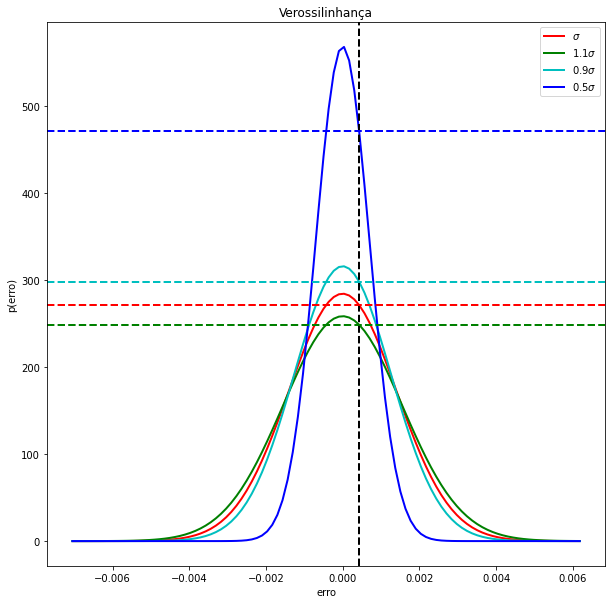

In [ ]:
fig= plt.figure(figsize=(10,10))

# Plot the PDF.
x = np.linspace(xmin, xmax, 100)
plt.plot(x, pv1, 'k', linewidth=2, color='r',label="$\sigma$")
plt.plot(x, pv2, 'k', linewidth=2, color='g',label="$1.1\sigma$")
plt.plot(x, pv3, 'k', linewidth=2, color='c',label="$0.9\sigma$")
plt.plot(x, pv4, 'k', linewidth=2, color='b',label="$0.5\sigma$")

plt.axvline(x=data[1],linewidth=2, color='k',linestyle='dashed')

plt.axhline(y=h1,linewidth=2, color='r',linestyle='dashed')
plt.axhline(y=h2,linewidth=2, color='g',linestyle='dashed')
plt.axhline(y=h3,linewidth=2, color='c',linestyle='dashed')
plt.axhline(y=h4,linewidth=2, color='b',linestyle='dashed')

title = "Verossilinhança"
plt.title(title)
plt.ylabel("p(erro)")
plt.xlabel("erro")
plt.legend(loc='upper right')


plt.show()

# **Referências**

https://stackoverflow.com/questions/50723432/gradient-descent-impementation-python-contour-lines